# Table of content:
- [Import libraries](#0)
- [Load the Dataset](#1)
- [Preprocessing](#2)
- [Building the Models](#3)
    - [K-Means](#4)
    - [Agglomerative Clustering](#5)
    - [DBSCAN](#6)


# Import libraries <a id = "0"></a> 

In [303]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Load the Dataset <a id = "1"></a>

<a href = 'https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python'>Link to the dataset in Kaggle.</a>
  
- CustomerID: Unique ID assigned to the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Annual Income: Annual Income of the customee
- Spending Score: Score assigned by the mall based on customer behavior and spending nature

In [304]:
customer = pd.read_csv('customer.csv')
print(f"Shape of dataset: {customer.shape}")
customer.head()

Shape of dataset: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [305]:
print(f"Null values:\n{customer.isnull().sum()}\n")
customer.info() 

Null values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Preprocessing <a id = "2"></a>

In [306]:
customer_new = customer.copy()

customer_new['Gender'].replace('Female', 0, inplace = True)
customer_new['Gender'].replace('Male', 1, inplace = True)

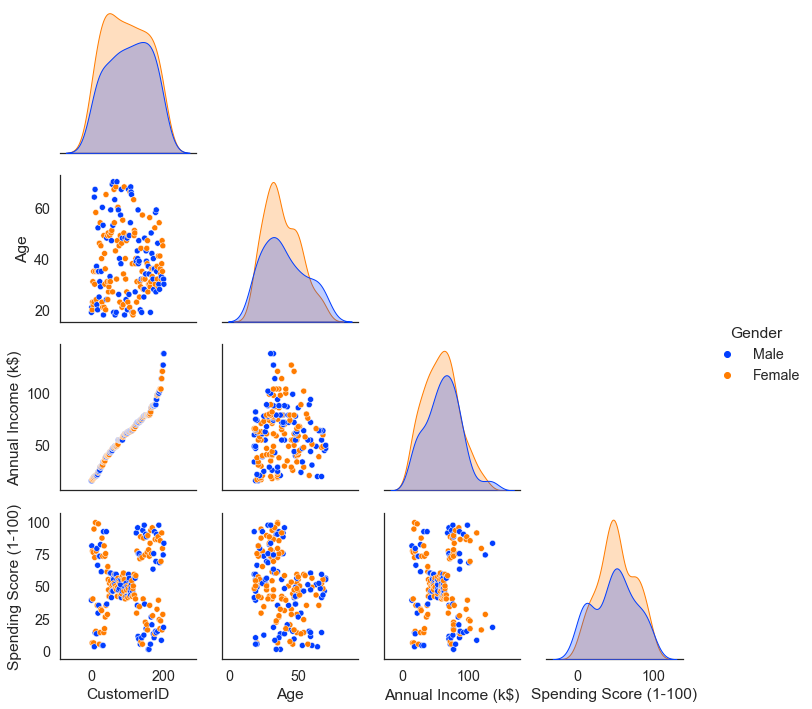

In [307]:
sns.pairplot(data = customer, hue = 'Gender', corner = True, palette = 'bright')

Text(0.5, 0, 'Age')

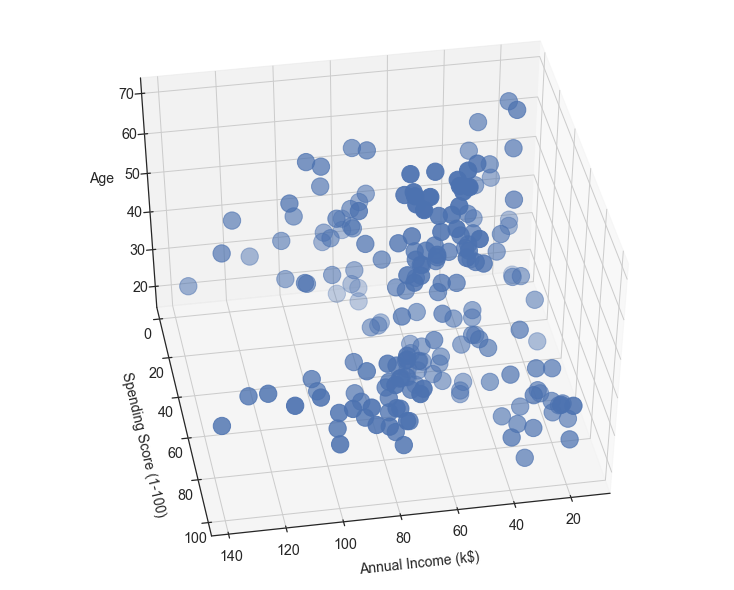

In [308]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300)

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

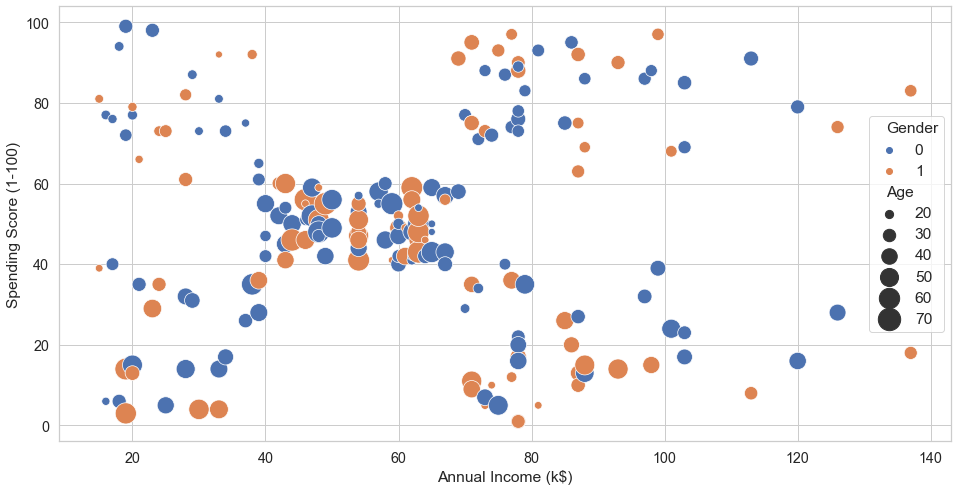

In [309]:
plt.figure(figsize = (16,8))
sns.set(style= "whitegrid", font_scale = 1.3)
sns.scatterplot(data = customer_new, x = 'Annual Income (k$)', 
                y = 'Spending Score (1-100)', hue = 'Gender', 
                size = 'Age', sizes = (50,500))

# Building the Models <a id = "3"></a>

In [310]:
std_scaler = StandardScaler()
X = customer_new.values[:,2:]
X_scaled = std_scaler.fit_transform(X)

## K-Means <a id = "4"></a>

In [311]:
kmeans_sse = []
kmeans_silhouette = []

for k in range(2,13):
    k_means = KMeans(n_clusters = k, init = 'k-means++', n_init = 15, max_iter = 100, 
                     random_state = 0).fit(X_scaled)
    kmeans_sse.append(k_means.inertia_)
    kmeans_silhouette.append(silhouette_score(X_scaled, k_means.labels_)) 

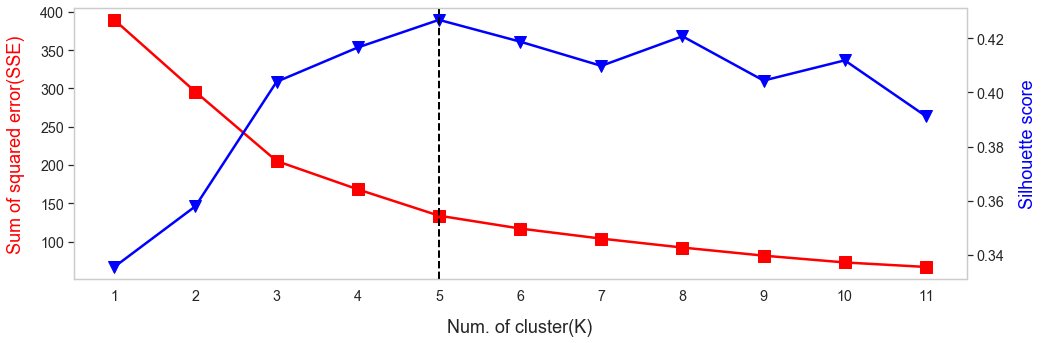

In [312]:
fig, ax1 = plt.subplots(figsize = (16,5))

ax1.plot(range(1, len(kmeans_sse)+1), kmeans_sse, marker = 's', markersize = 12, 
         linewidth = 2.5, color = 'red')
ax1.set_xlabel("Num. of cluster(K)", fontsize = 18, labelpad = 15)
ax1.set_ylabel("Sum of squared error(SSE)", color = 'red', fontsize = 18, labelpad = 15)
ax1.grid(False)

ax2 = ax1.twinx()

ax2.plot(range(1, len(kmeans_silhouette)+1), kmeans_silhouette, marker = 'v', markersize = 12, 
         linewidth = 2.5, color = 'blue')
ax2.set_ylabel("Silhouette score", color = 'blue', fontsize = 18, labelpad = 15)
ax2.grid(False)

ax2.axvline(x = 5, linestyle = '--', lw = 2, color = 'black')

plt.xticks(range(1, len(kmeans_silhouette)+1))

plt.show()

#### In K-Means algorithm, K is selected equal to 5. Because:
   - In K=5, the Silhouette score has the highset score.
   - In K=5, according to the elbow method, there is an elbow.

In [313]:
k_means_5 = KMeans(n_clusters = 5, init = 'k-means++', n_init = 15, max_iter = 100,
                   random_state = 0).fit_predict(X_scaled)

customer_kmeans = customer_new.copy()
customer_kmeans['K-Means label'] = k_means_5
customer_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K-Means label
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


Text(0.5, 0, 'Age')

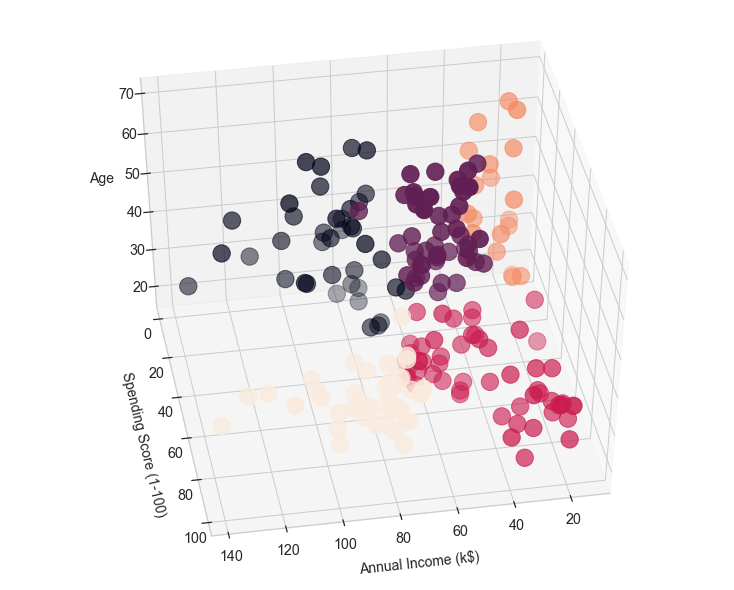

In [314]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300, c = k_means_5.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

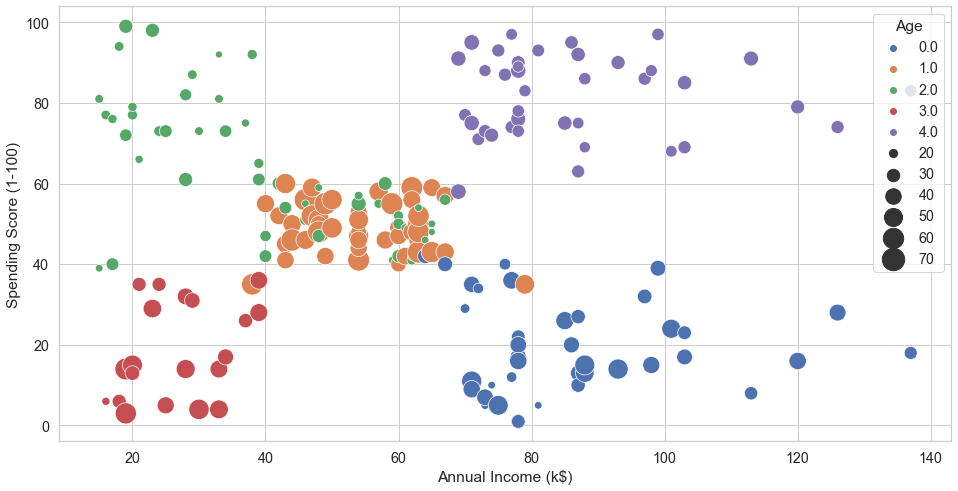

In [315]:
plt.figure(figsize = (16,8))
sns.set(style = "whitegrid", font_scale = 1.3)
sns.scatterplot(data = customer_new, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = k_means_5.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

<Figure size 1152x1152 with 0 Axes>

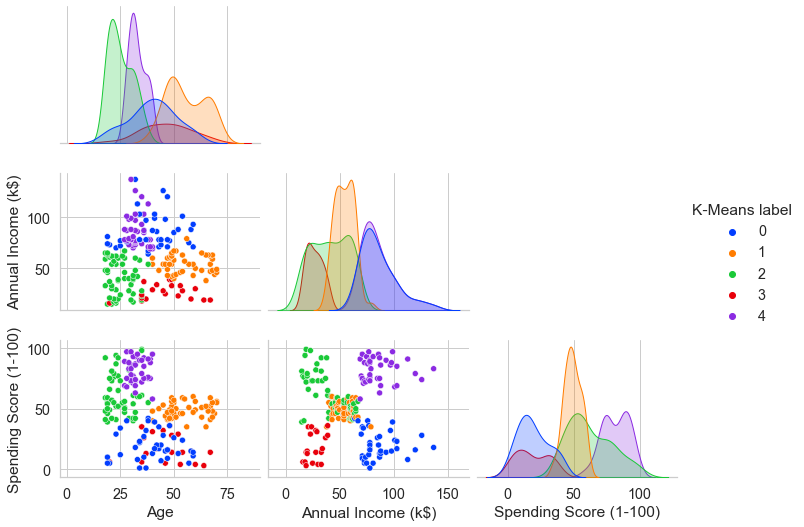

In [316]:
plt.figure(figsize = (16,16))
sns.pairplot(data = customer_kmeans, vars = ['Age','Annual Income (k$)', 'Spending Score (1-100)'], 
             hue = 'K-Means label', corner = True, palette = 'bright',
             aspect = 1.3)

In [317]:
print(customer_kmeans['K-Means label'].value_counts())
customer_kmeans_mean = customer_kmeans.groupby(by = 'K-Means label').mean()
customer_kmeans_mean

2    54
1    47
4    40
0    39
3    20
Name: K-Means label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
K-Means label,,,,,
0,159.743590,0.512821,39.871795,86.102564,19.358974
1,83.872340,0.425532,55.638298,54.382979,48.851064
2,55.648148,0.407407,25.185185,41.092593,62.240741
3,24.100000,0.400000,46.250000,26.750000,18.350000
4,161.025000,0.450000,32.875000,86.100000,81.525000


#### Based on the K-Means algorithm, 5 clusteres were identified:
- Label 0: People with **high** annual incomes but **low** spending scores.
- Label 1: **Older** people with **average** annual incomes and **average** spending scores.
- Label 2: **Young** people with **low** annual incomes but **high** spending scores.
- Label 3: **Middle-aged** people with **low** annual incomes and **low** spending scores.
- Label 4: **Young** people with **high** annual incomes but **high** spending scores.

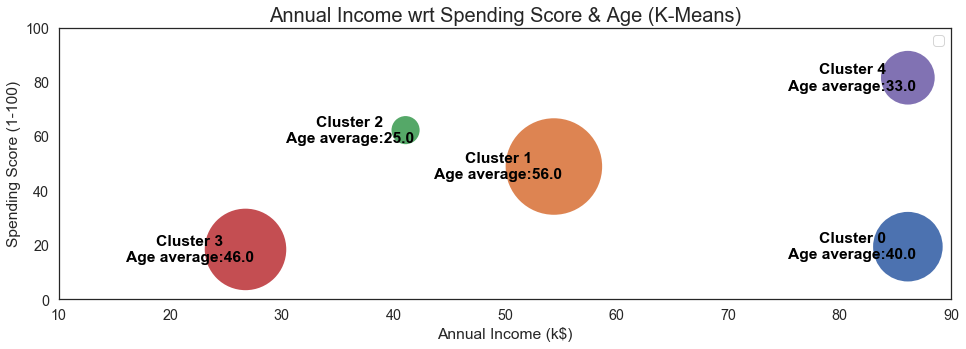

In [318]:
plt.figure(figsize = (16,5))
sns.set(style = "white", font_scale = 1.3)

for i in list(range(0,5)):
        plt.text(customer_kmeans_mean['Annual Income (k$)'][i]-5, 
                 customer_kmeans_mean['Spending Score (1-100)'][i],
                 s = "Cluster " + str(i) + "\nAge average:" + str(round(customer_kmeans_mean['Age'][i],0)) ,
                 color='black',
                 weight='semibold',
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                )

sns.scatterplot(data = customer_kmeans_mean,
                x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = customer_kmeans_mean.index,
                palette = 'deep',
                size = 'Age',
                sizes = (1000,10000)
                )

plt.title("Annual Income wrt Spending Score & Age (K-Means)", size = 20)
plt.xlim(10, 90)
plt.ylim(0, 100)
plt.legend([])

## Agglomerative Clustering <a id = "5"></a>

In [319]:
agg = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit_predict(X_scaled)

customer_agg = customer_new.copy()
customer_agg['Agg label'] = agg
customer_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agg label
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


Text(0.5, 0, 'Age')

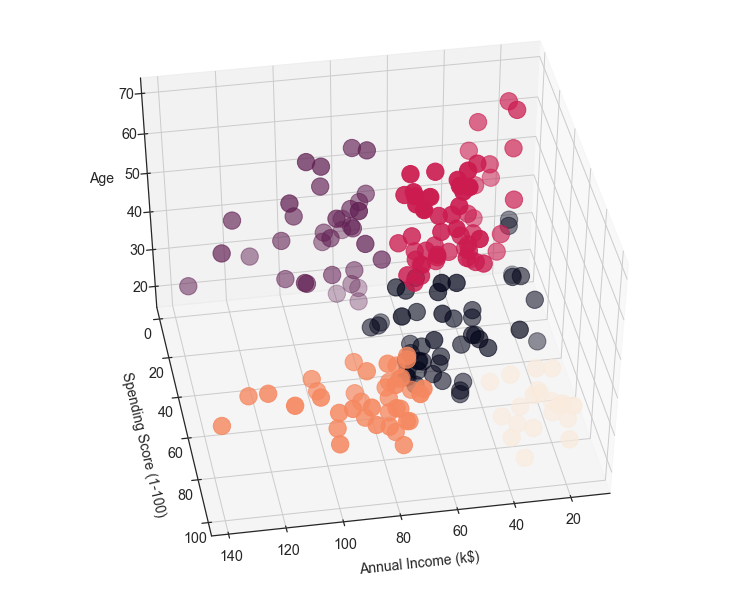

In [320]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_agg['Annual Income (k$)'], customer_agg['Spending Score (1-100)'], 
           customer_agg['Age'], s = 300, c = agg.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

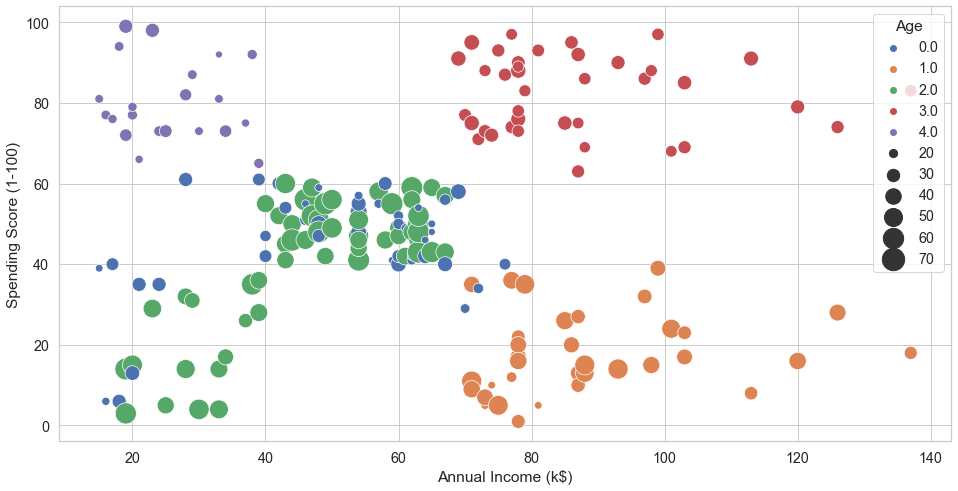

In [321]:
plt.figure(figsize = (16,8))
sns.set(style = "whitegrid", font_scale = 1.3)
sns.scatterplot(data = customer_agg, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = agg.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [322]:
print(customer_agg['Agg label'].value_counts())
customer_agg_mean = customer_agg.groupby(by = 'Agg label').mean()
customer_agg_mean.head()

2    57
0    48
3    39
1    35
4    21
Name: Agg label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Agg label,,,,,
0,76.312500,0.354167,28.354167,50.291667,45.937500
1,164.428571,0.571429,41.685714,88.228571,17.285714
2,68.140351,0.438596,55.333333,47.315789,41.087719
3,162.000000,0.461538,32.692308,86.538462,82.128205
4,22.857143,0.380952,24.809524,25.619048,80.238095


#### Based on the Agglomerative clustering algorithm, 5 clusteres were identified:
- This algorithm offers no special advantage over K-Means, nor does it have a better method of determining the number of clusters than K-Means.

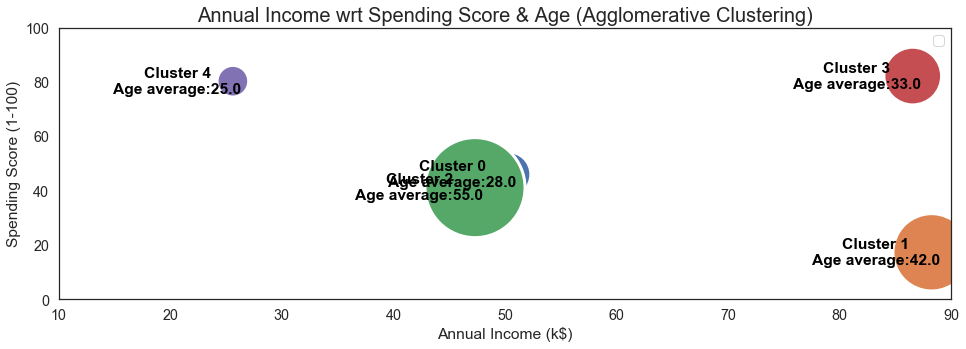

In [323]:
plt.figure(figsize = (16,5))
sns.set(style = "white", font_scale = 1.3)

for i in list(range(0,5)):
        plt.text(customer_agg_mean['Annual Income (k$)'][i]-5, 
                 customer_agg_mean['Spending Score (1-100)'][i],
                 s = "Cluster " + str(i) + "\nAge average:" + str(round(customer_agg_mean['Age'][i],0)) ,
                 color='black',
                 weight='semibold',
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                )

sns.scatterplot(data = customer_agg_mean,
                x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = customer_agg_mean.index,
                palette = 'deep',
                size = 'Age',
                sizes = (1000,10000)
                )

plt.title("Annual Income wrt Spending Score & Age (Agglomerative Clustering)", size = 20)
plt.xlim(10, 90)
plt.ylim(0, 100)
plt.legend([])

## DBSCAN <a id = "6"></a>

In [324]:
dbscan_silhouette = []
dbscan_ncluster = []

for i in np.arange(0.4, 1, 0.1):
    for j in range(3, 10):
        dbscan = DBSCAN(eps = i, min_samples = j, n_jobs = -1).fit(X_scaled)
        dbscan_silhouette.append(silhouette_score(X_scaled, dbscan.labels_)) 
        dbscan_ncluster.append(len(np.unique(dbscan.labels_)))
        
dbscan_silhouette = np.asarray(dbscan_silhouette).reshape(len(np.arange(0.4, 1, 0.1)), 
                                                          len(range(3, 10)))
dbscan_ncluster = np.asarray(dbscan_ncluster).reshape(len(np.arange(0.4, 1, 0.1)), 
                                                          len(range(3, 10)))

dbscan_silhouette_df = pd.DataFrame(dbscan_silhouette, 
                                    columns = list(range(3, 10)),
                                    index = list(np.arange(0.4,1,0.1))
                                   )
dbscan_ncluster_df = pd.DataFrame(dbscan_ncluster, 
                                    columns = list(range(3, 10)),
                                    index = list(np.arange(0.4,1,0.1))
                                   )

Text(0.5, 1, 'Number of Clusters')

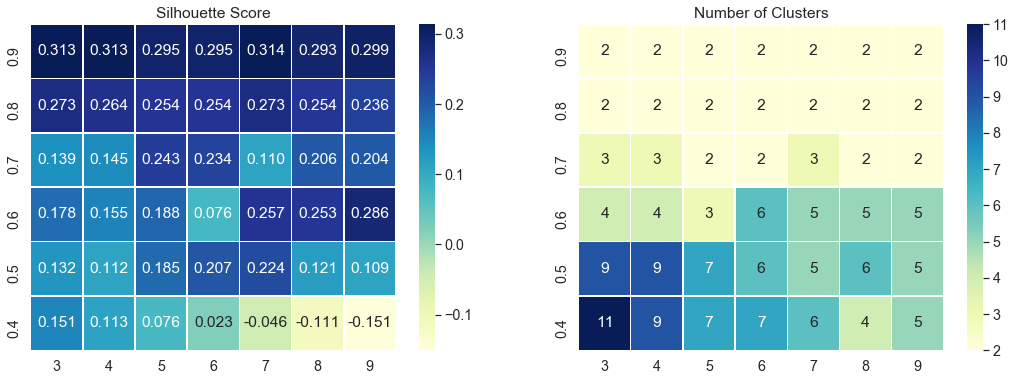

In [325]:
plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
ax = sns.heatmap(dbscan_silhouette_df, annot = True, linewidths= .5, 
            cmap = "YlGnBu", yticklabels = dbscan_silhouette_df.index.values.round(2),
            fmt = '0.3f'
            )
up, down = ax.get_ylim()
ax.set_ylim(down - 0.5, up + 0.5)
plt.title("Silhouette Score")

plt.subplot(1, 2, 2)
ax = sns.heatmap(dbscan_ncluster_df, annot = True, linewidths= .5, 
            cmap = "YlGnBu", yticklabels = dbscan_ncluster_df.index.values.round(2)
            )
up, down = ax.get_ylim()
ax.set_ylim(down - 0.5, up + 0.5)
plt.title("Number of Clusters")

#### In DBSCAN algorithm, eps = 0.6 & min_samples = 9. Because:
- With this parameters, the DBSCAN algorithm has a high Silhouette score.
- It should also be noted that the number of optimal clusters is more than two.

In [326]:
dbscan_9 = DBSCAN(eps = 0.6, min_samples = 9, n_jobs = -1).fit_predict(X_scaled)

customer_dbscan = customer_new.copy()
customer_dbscan['DBSCAN label'] = dbscan_9
customer_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN label
0,1,1,19,15,39,-1
1,2,1,21,15,81,0
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,-1


Text(0.5, 0, 'Age')

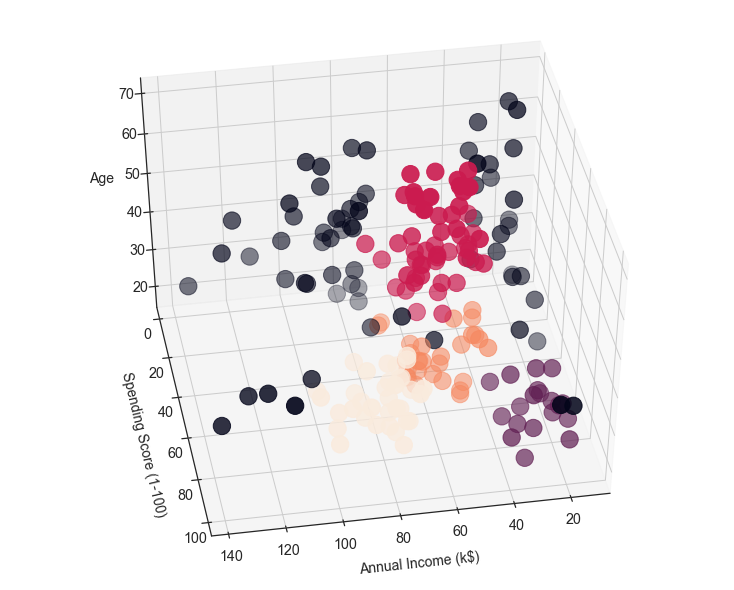

In [327]:
fig, ax = plt.subplots(figsize = (10,8))
ax = Axes3D(fig, elev = 45, azim = 80)

ax.scatter(customer_new['Annual Income (k$)'], customer_new['Spending Score (1-100)'], 
           customer_new['Age'], s = 300, c = dbscan_9.astype(np.float))

ax.set_xlabel('Annual Income (k$)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Spending Score (1-100)', fontsize = 14, labelpad = 15)
ax.set_zlabel('Age', fontsize = 14, labelpad = 15)

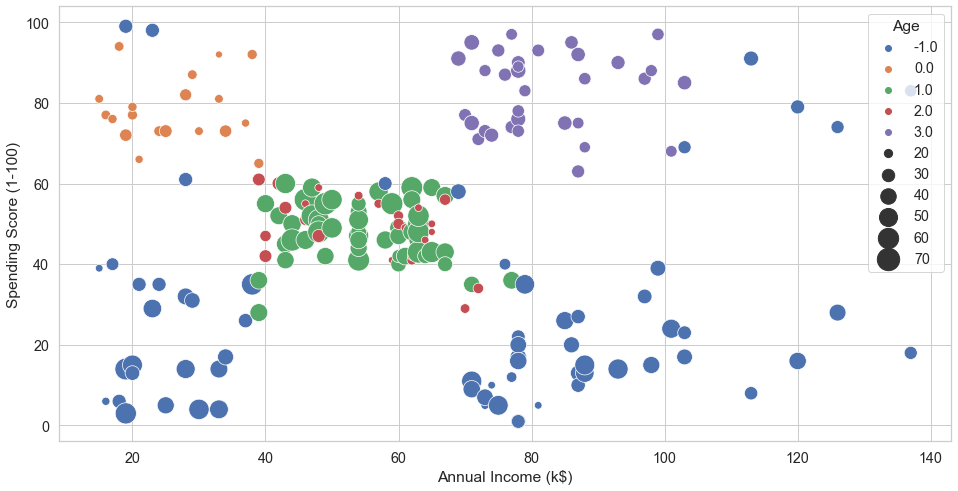

In [328]:
plt.figure(figsize = (16,8))
sns.set(style = "whitegrid", font_scale = 1.3)
sns.scatterplot(data = customer_dbscan, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = dbscan_9.astype(np.float), palette = 'deep', size = 'Age', 
                sizes = (50,500))

In [329]:
print(customer_dbscan['DBSCAN label'].value_counts())
customer_dbscan_mean = customer_dbscan.groupby(by = 'DBSCAN label').mean()
customer_dbscan_mean

-1    65
 1    53
 3    34
 2    29
 0    19
Name: DBSCAN label, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN label,,,,,
-1,112.569231,0.446154,41.307692,66.753846,27.123077
0,23.578947,0.421053,23.736842,26.105263,78.315789
1,85.169811,0.452830,53.358491,54.905660,47.924528
2,85.620690,0.379310,24.068966,54.862069,49.724138
3,157.000000,0.470588,32.588235,81.647059,82.558824


#### Based on the DBSCAN algorithm, 4 clusteres were identified (and 65 outliers!):
- It turned out that this algorithm did not perform well in clustering. This could have been predicted before writing the code. Few samples were available and the relative density was low.

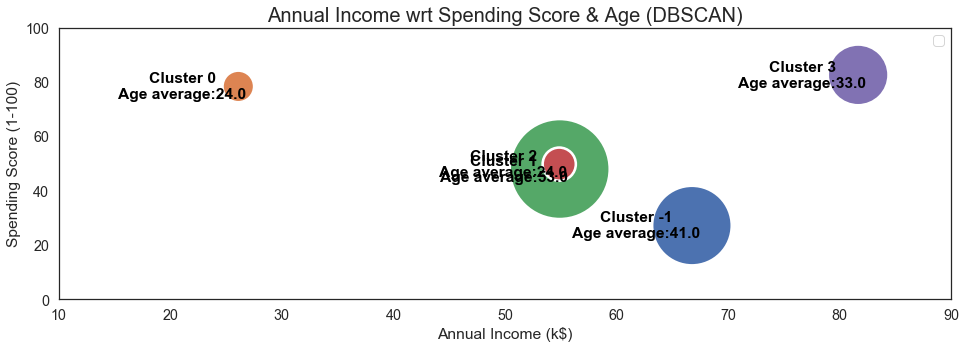

In [330]:
plt.figure(figsize = (16,5))
sns.set(style = "white", font_scale = 1.3)

for i in list(np.arange(-1,4,1)):
        plt.text(customer_dbscan_mean['Annual Income (k$)'][i]-5, 
                 customer_dbscan_mean['Spending Score (1-100)'][i],
                 s = "Cluster " + str(i) + "\nAge average:" + str(round(customer_dbscan_mean['Age'][i],0)) ,
                 color='black',
                 weight='semibold',
                 horizontalalignment = 'center',
                 verticalalignment = 'center'
                )

sns.scatterplot(data = customer_dbscan_mean,
                x = 'Annual Income (k$)',
                y = 'Spending Score (1-100)',
                hue = customer_dbscan_mean.index,
                palette = 'deep',
                size = 'Age',
                sizes = (1000,10000)
                )

plt.title("Annual Income wrt Spending Score & Age (DBSCAN)", size = 20)
plt.xlim(10, 90)
plt.ylim(0, 100)
plt.legend([])